# <center>  TEST CASE </center>
### Early-Stage Diabetes Risk Prediction Data Set

### Table of Content
- [OBJECTIVE](#obj)
- [Load file](#loaddata)
- [< EDA Section >](#eda)
    - 1. [Unique Value in Categorical Columns](#eda1)
    - 2. [Age's Distribution](#eda2)
        - 2.1 [General Age's Distribution](#eda2.1)
        - 2.2 [Age's Distribution in each Categorical feature](#eda2.2)
        - 2.3 [Age's Distribution in Positive Class Feature](#eda2.3)
    - 3. [Categorical Feature Distribution](#eda3)
        - 3.1 [General Portion of each Category](#eda3.1)
        - 3.2 [Category portion in Class Feature](#eda3.2)
        - 3.3 [Categorical vs Possitive Class ](#eda3.3)
        - 3.4 [Categorical vs Possitive Class grouped by Gender](#eda3.4)
    - 4. [Relation between Features](#eda4)
        - 4.1 [Relation between Categorical Feature](#eda4.1)
            - 4.1A [Association with CramerV](#eda4.1a)
            - 4.1B [Hypotesis Testing](#eda4.1b)
        - 4.2 [Relation between Continues and Categorical](#eda4.2)
- [< MODEL BUILDING section >](#mb)
    - 1. [Preparing the Data](#mb1)
        - 1.1 [Spliting Data (Train & Test)](#mb1.1)
        - 1.2 [Scaling Age Feature](#mb1.2)
    - 2. [Building Model for Training - Testing](#mb2)
    - 3. [Building Final Model](#mb3)
        - 3.1 [Building the Model Pipeline](#mb3.1)
        - 3.2 [Training Model Pipeline and Check Score with Cross Validation, predict Raw Data](#mb3.2)
- [SUMMARY](#sum)
        

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
%matplotlib inline

## OBJECTIVE <a id='obj'> </a>

Details:
1. Kindly analyze and visualize Data. Kindly show us summary of some findings based on your analysis.
2. Kindly develop prediction model to distinguish person who has Diabetes or not.

## Loading the Data <a id='loaddata'> </a>

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
# General info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

- From Table above we can see our data has no missing value in each column. It means we dont need to do the fill process.
- There are 17 columns in our data, and Type Data Age is the only one data who has integer (number) type, and for the others have object type.

## < EDA Section > <a id='eda'> </a>

### 1. Unique Value in Categorical Columns <a id='eda1'> </a>

In [4]:
dict_to_plot = {}
for item in df.columns:
    if item != 'Age':
        unique_item = df[item].unique()
        len_item = len(unique_item)
        dict_to_plot[item] = {'unique_item' : list(unique_item), 'len_item':len_item}

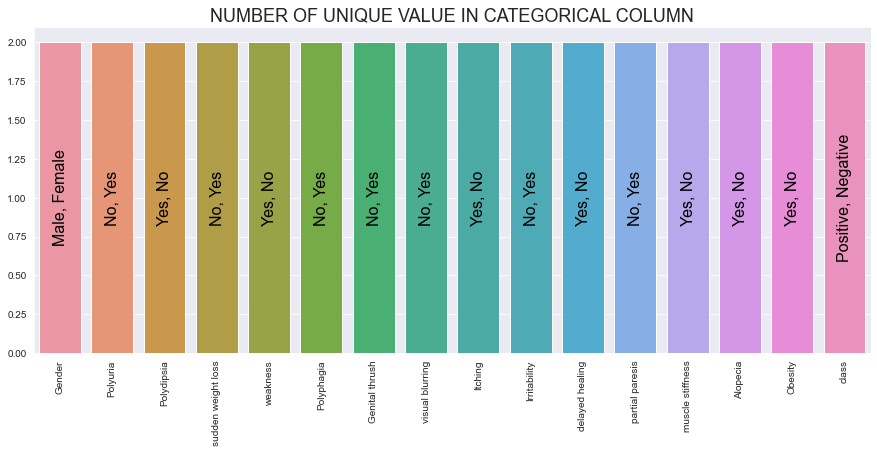

In [5]:
plt.figure(figsize=(15,6))
plt.title('NUMBER OF UNIQUE VALUE IN CATEGORICAL COLUMN', fontsize=18)

count_unique = sns.barplot(x=list(dict_to_plot.keys()), y=[i['len_item'] for i in dict_to_plot.values()])

for index, text in enumerate([i['unique_item'] for i in dict_to_plot.values()]):
    count_unique.text(index, 1, ', '.join(text), color='black', ha="center", va='center', rotation=90, fontsize=16)

plt.xticks(rotation=90)
plt.show()

- First we would like to see the unique value in our Categorical Feature.
- from the graph above, we can see number of unique item of each categorical columns, and its value (text inside each bar). All the columns has 2 unique items, like Gender has 2 unique they are Male nad Female, etc.
- It shows us, the symtomp columns (Polyuria - Obesity), it seems like a 'Yes or No' question. 

### 2. Age's Distribution  <a id='eda2'> </a>

#### 2.1 General Age's Distribution  <a id='eda2.1'> </a>

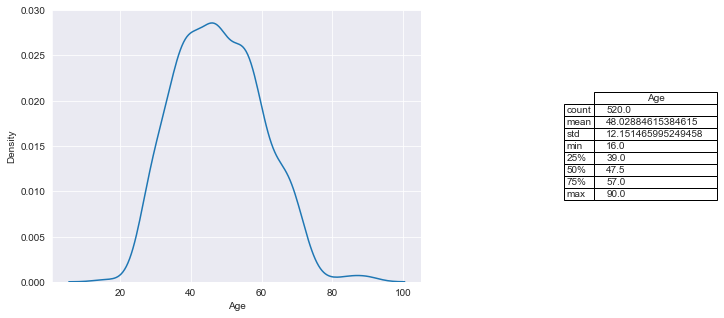

In [6]:
summary_age = pd.DataFrame(df.Age.describe())
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,5),gridspec_kw=dict(width_ratios=[3,1]))

sns.kdeplot(df.Age, ax=ax1)

ax2.axis("off")
ax2 = plt.table(cellText=summary_age.values,
                rowLabels=summary_age.index,
                colLabels=summary_age.columns,
                cellLoc = 'left', rowLoc = 'left',
                loc='right')

plt.subplots_adjust(right=1.2)
plt.show()

- from the graph we can see the distribution of Age in our Data is most likely a Normal Distribution.
- We can also see in the Describe Table our Mean is 48 and our Median (50%) is 47.5, its very close, so we can assume this distribution is a Normal Distribution.
- with This normal Distribution we can do parametric statistical test, in this case T-Test
- And also we want to know about Ages's distribution of each Categorical Feature in next graph

#### 2.2 Age's Distribution in each Categorical feature  <a id='eda2.2'> </a>

- We will plot the Age's distribution for each feature, 
- And also will do hypotesis testing to check wheter there is significant difference in their average age with T-Test

In [7]:
from scipy.stats import ttest_ind, ttest_1samp

In [8]:
col0 = list(df.columns)
col0.remove('Age')

col1 = col0.copy()
col1.remove('class')

col2 = col1.copy()
col2.remove('Gender')

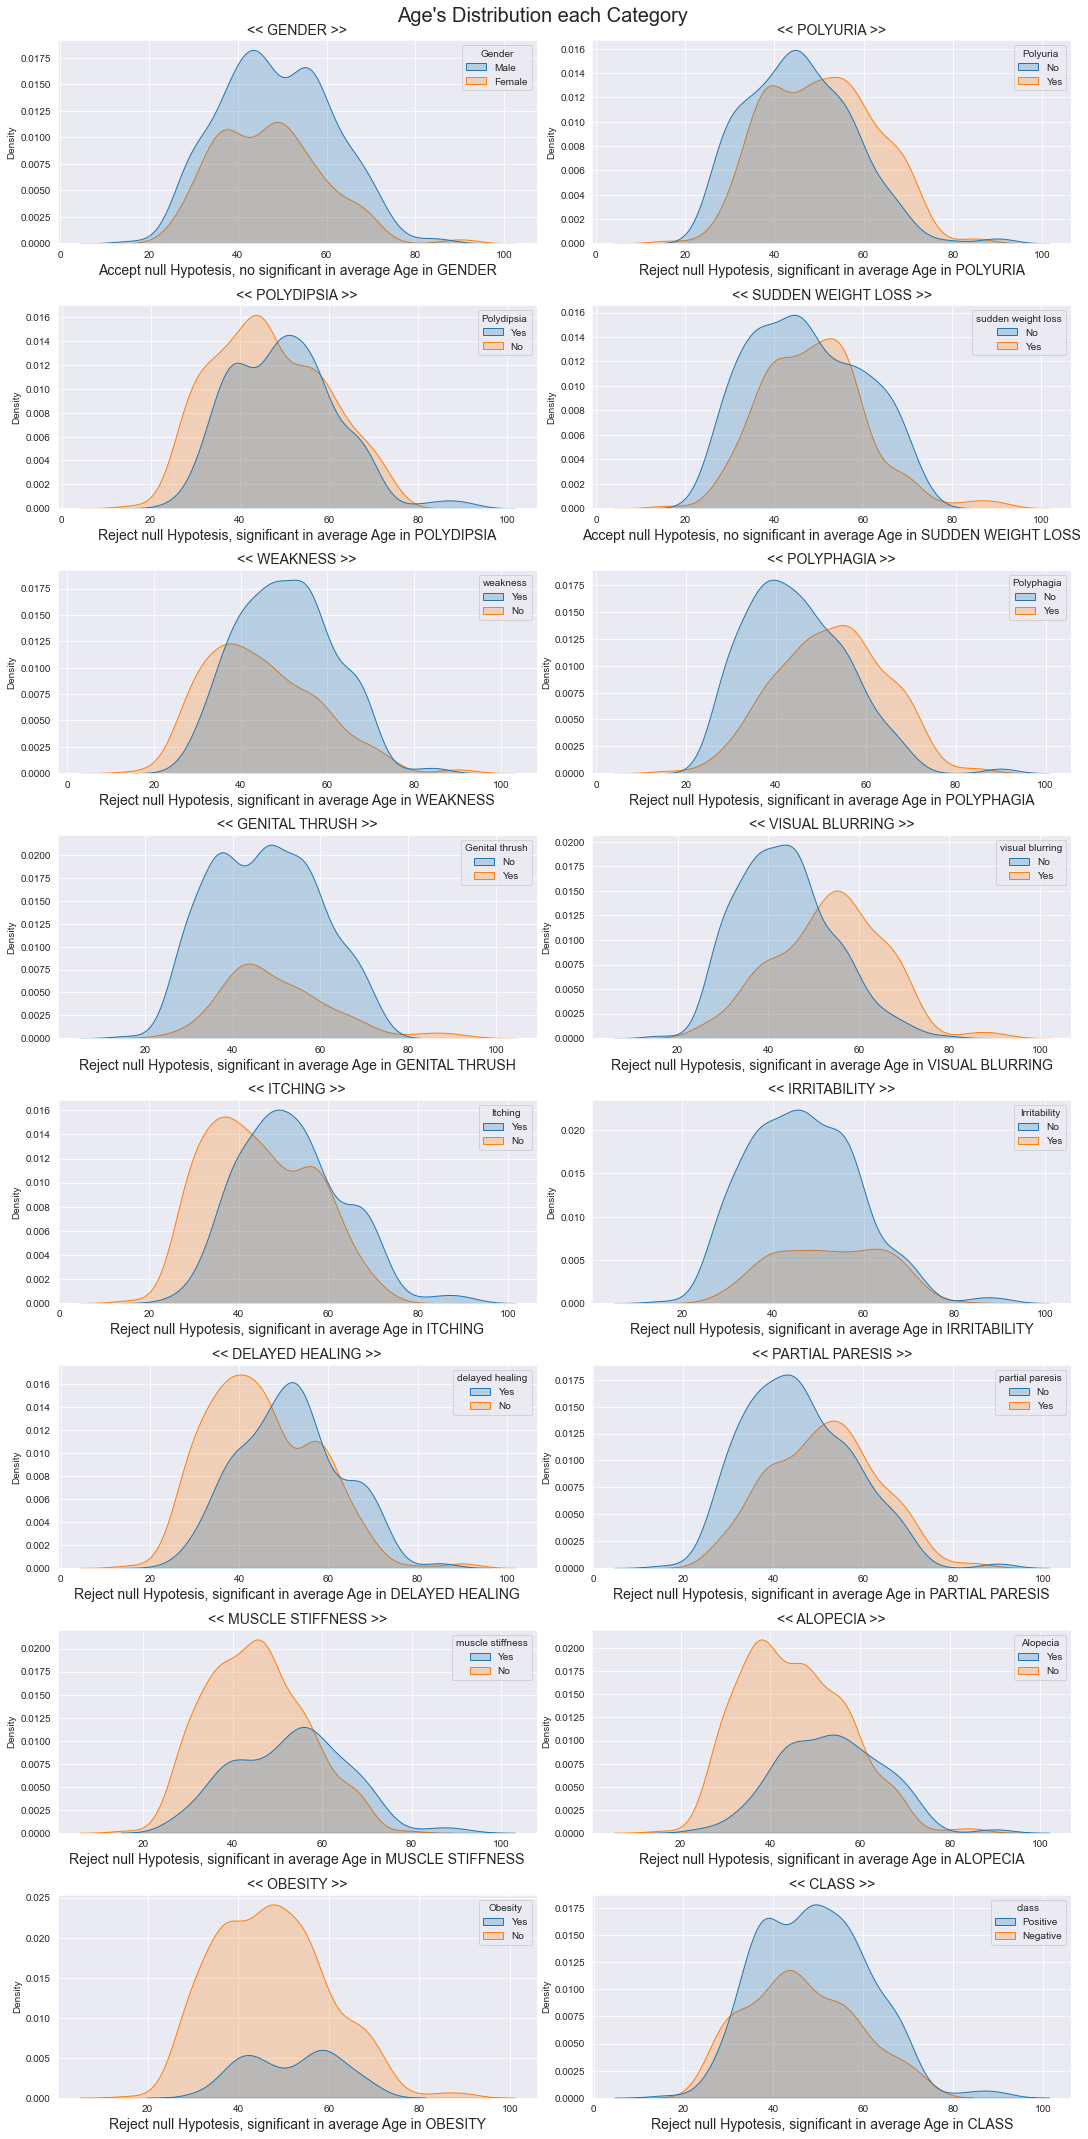

In [9]:
fig, axs = plt.subplots(8, 2, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()
accept_null = []
reject_null = []
alpha = 0.05

for item, col in enumerate(col0):
    unique_item = dict_to_plot[col]['unique_item']
    kde_plot = sns.kdeplot(data=df, x= 'Age', hue=col, ax=axs[item], fill=True)
    _, pval = ttest_ind(df.Age[df[col] == unique_item[0]], df.Age[df[col] == unique_item[1]])
    
    if pval < alpha:
        reject_null.append(col)
        text = f"Reject null Hypotesis, significant in average Age in {col.upper()}"
    else:
        accept_null.append(col)
        text = f"Accept null Hypotesis, no significant in average Age in {col.upper()}"
        
    axs[item].set_title(f'<< {col.upper()} >>', fontsize=14)
    axs[item].set_xlabel(f"{text}", fontsize=14)

fig.suptitle("Age's Distribution each Category", va='bottom', fontsize =20)
fig.tight_layout()

In [10]:
print('Group of accepting Null Hypotesis :', accept_null, sep='\n')
print('-------------------------------')
print('Group of rejecting Null Hypotesis :', reject_null, sep='\n')

Group of accepting Null Hypotesis :
['Gender', 'sudden weight loss']
-------------------------------
Group of rejecting Null Hypotesis :
['Polyuria', 'Polydipsia', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


- First we state a hypotesis as below ;
    - The null hypotesis : There is no Significant different in average Age,
    - The Alternative hypothesis : There is Significant different in average Age.
- And we also set the alpha 5%.
- From T-test independent we can see, only Gender and Sudden Weight loss that accept the null hypotesis, and the others rejecting the null hypotesis.
- We can draw a conclusion that we are 95% sure there is a statiscal significant different in average age in those features. Otherwise in Gender and Sudden Weight Loss, there is no significant different in average Age.
- Something interesting is in "CLASS" feature, we reject the null hypotesis it means in "CLASS", the average age of POSITIVE and NEGATIVE is statiscal different.

#### 2.3 Age's Distribution in Positive Class Feature <a id='eda2.3'> </a>

- We are interested to analyze deeper into Possitive Class, to see what is the distribution of Age from Positive Class.
- And also we will retest again with the hypotesis testing, and see the result.

In [11]:
df_positive = df[df['class'] == "Positive"].copy()
df_positive.shape

(320, 17)

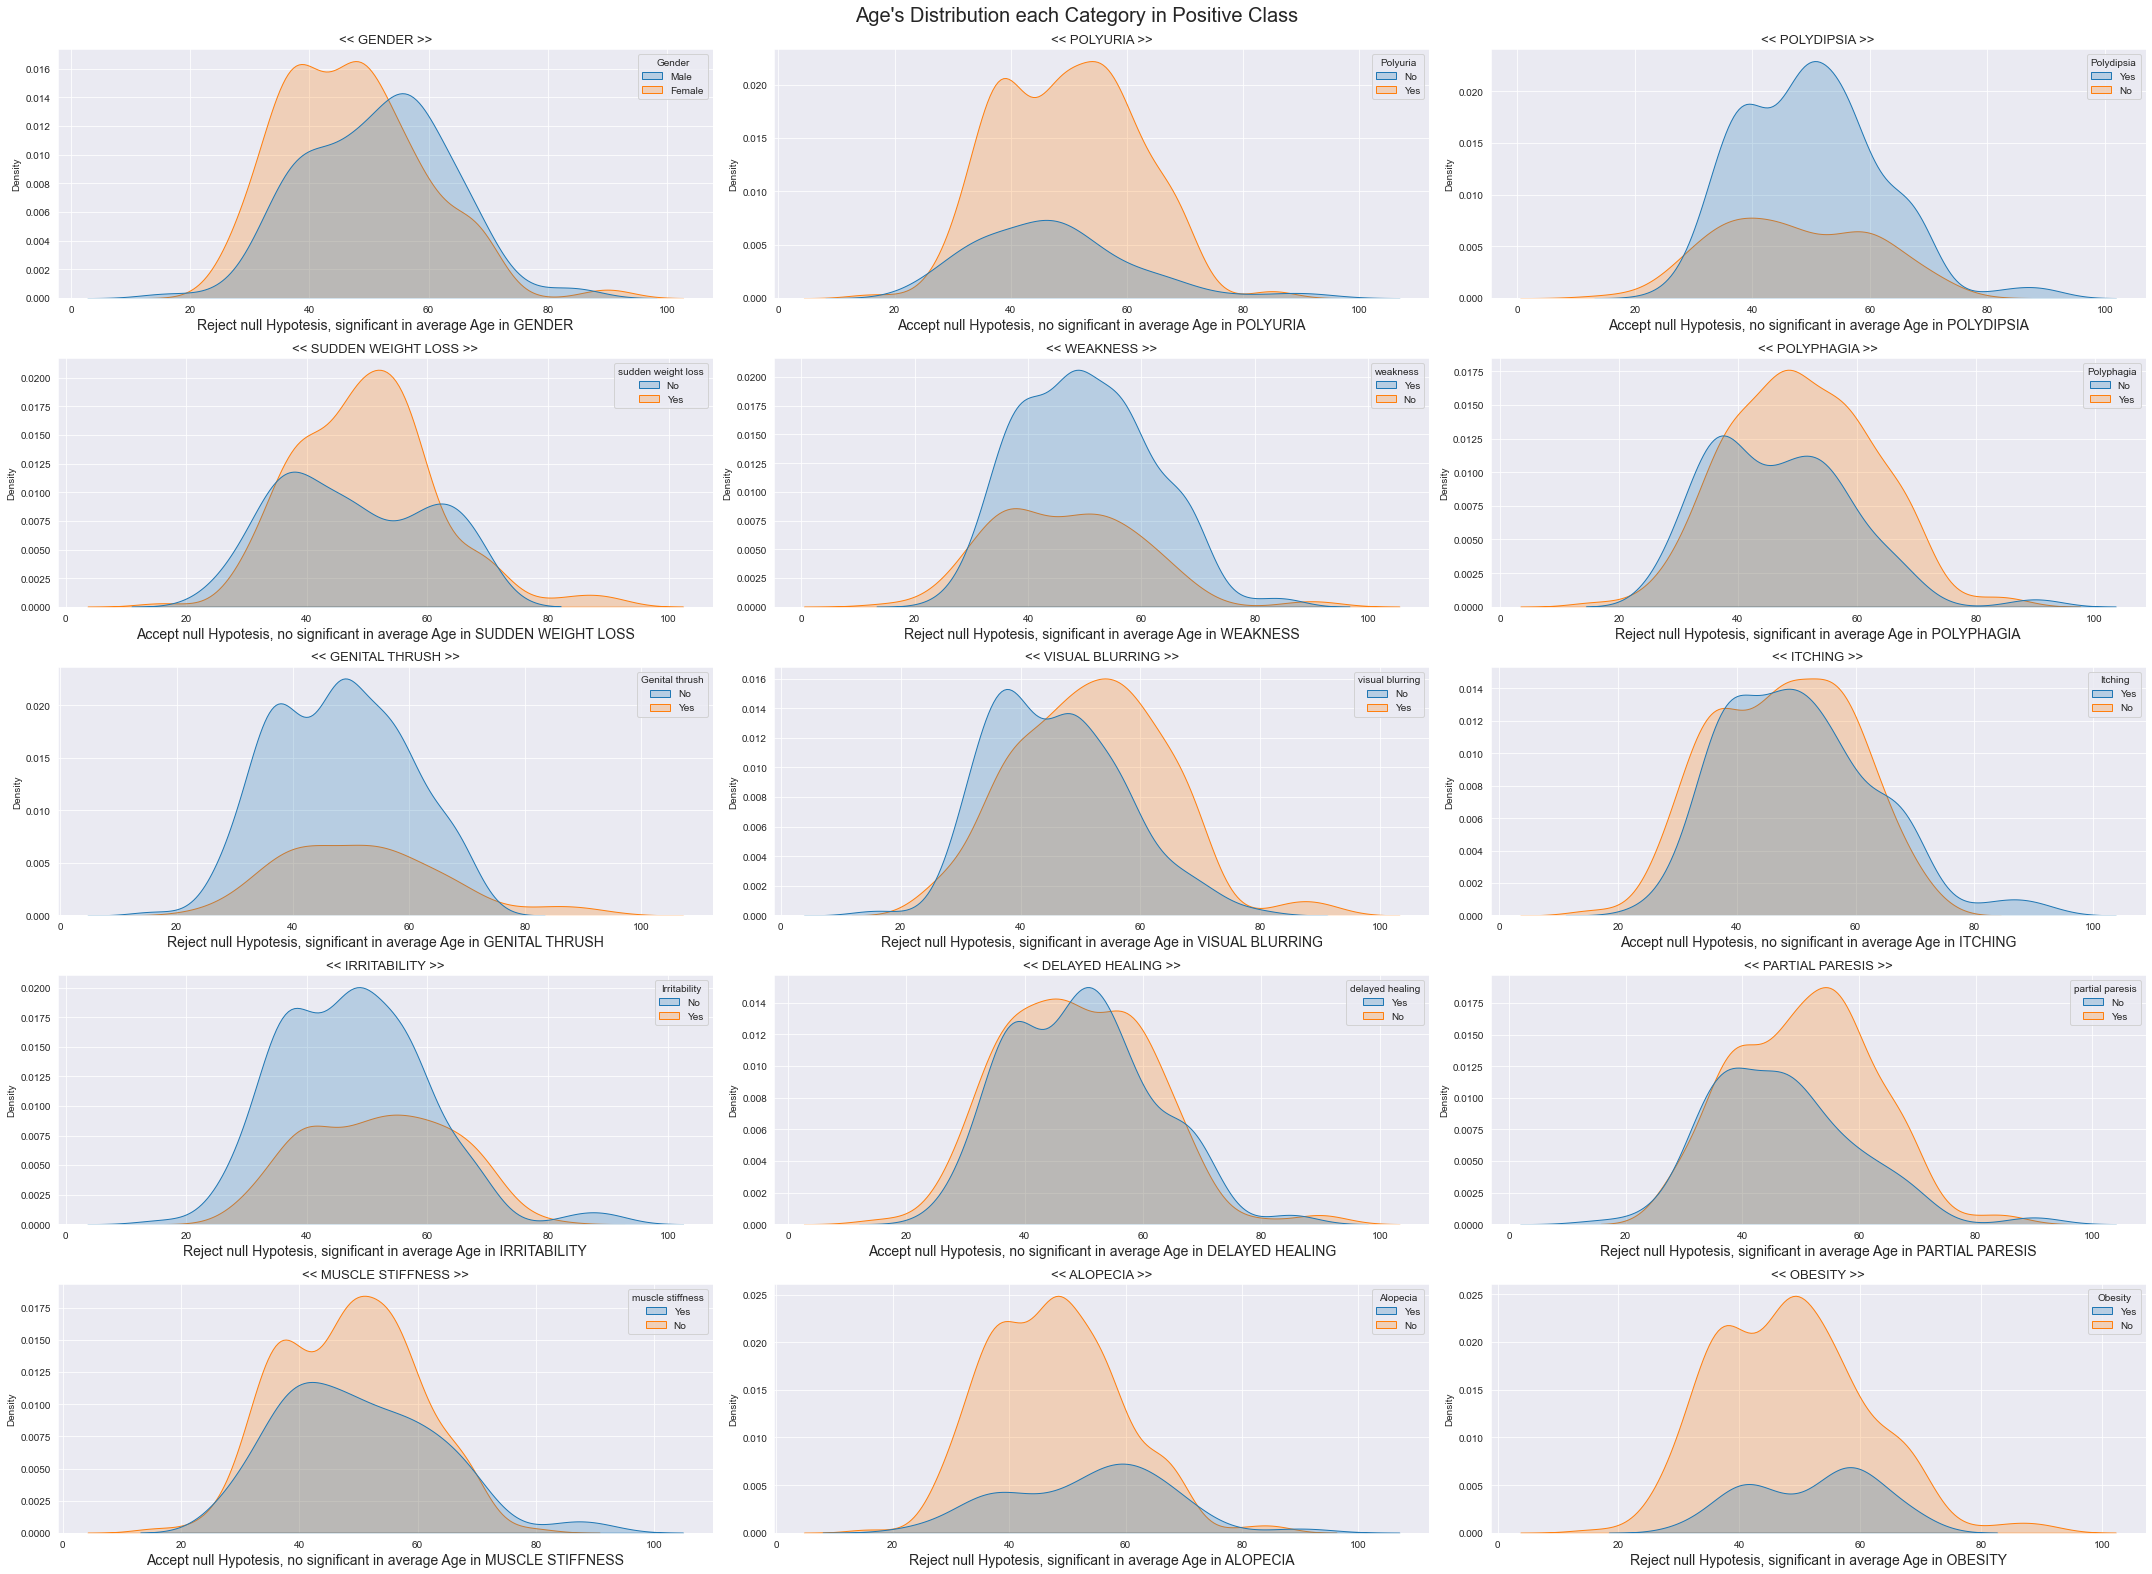

In [12]:
fig, axs = plt.subplots(5,3, figsize=(30, 22), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()
accept_null_positive = []
reject_null_positive = []
alpha = 0.05

for item, col in enumerate(col1):
    unique_item = dict_to_plot[col]['unique_item']
    kde_plot_pos = sns.kdeplot(data=df_positive, x= 'Age', hue=col, ax=axs[item], fill=True)
    _, pval = ttest_ind(df_positive.Age[df[col] == unique_item[0]], df_positive.Age[df[col] == unique_item[1]])
    
    if pval < alpha:
        reject_null_positive.append(col)
        text = f"Reject null Hypotesis, significant in average Age in {col.upper()}"
    else:
        accept_null_positive.append(col)
        text = f"Accept null Hypotesis, no significant in average Age in {col.upper()}"
        
    axs[item].set_title(f'<< {col.upper()} >>', fontsize=13)
    axs[item].set_xlabel(f"{text}", fontsize=14)

fig.suptitle("Age's Distribution each Category in Positive Class", va='bottom', fontsize =20)
fig.tight_layout()

In [13]:
print('<< POSITIVE CLASS >>\n')
print('Group of accepting Null Hypotesis :', accept_null_positive, sep='\n')
print('-------------------------------------------------------------------')
print('Group of rejecting Null Hypotesis :', reject_null_positive, sep='\n')

<< POSITIVE CLASS >>

Group of accepting Null Hypotesis :
['Polyuria', 'Polydipsia', 'sudden weight loss', 'Itching', 'delayed healing', 'muscle stiffness']
-------------------------------------------------------------------
Group of rejecting Null Hypotesis :
['Gender', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Irritability', 'partial paresis', 'Alopecia', 'Obesity']


- We will use the same hypotesis as before
- From Hypotesis testing we get different result from the first test that we did, as mention above.
- We can get insight which symtomp that has effect with age in Positive Class.
- We see that Gender right now has significant average of Age in Positive Class.
- Right now some symtomps are likely to accept null Hypotesis, it means Age doesnt have significant effect in this "Accepting null Hypotesis" group.
- Sudden Weight Loss is contantly the same group (Accepting null Hypotesis) as the first test.

### 3. Categorical Feature Distribution <a id='eda3'> </a>

#### 3.1 General Portion of each Category <a id='eda3.1'> </a>

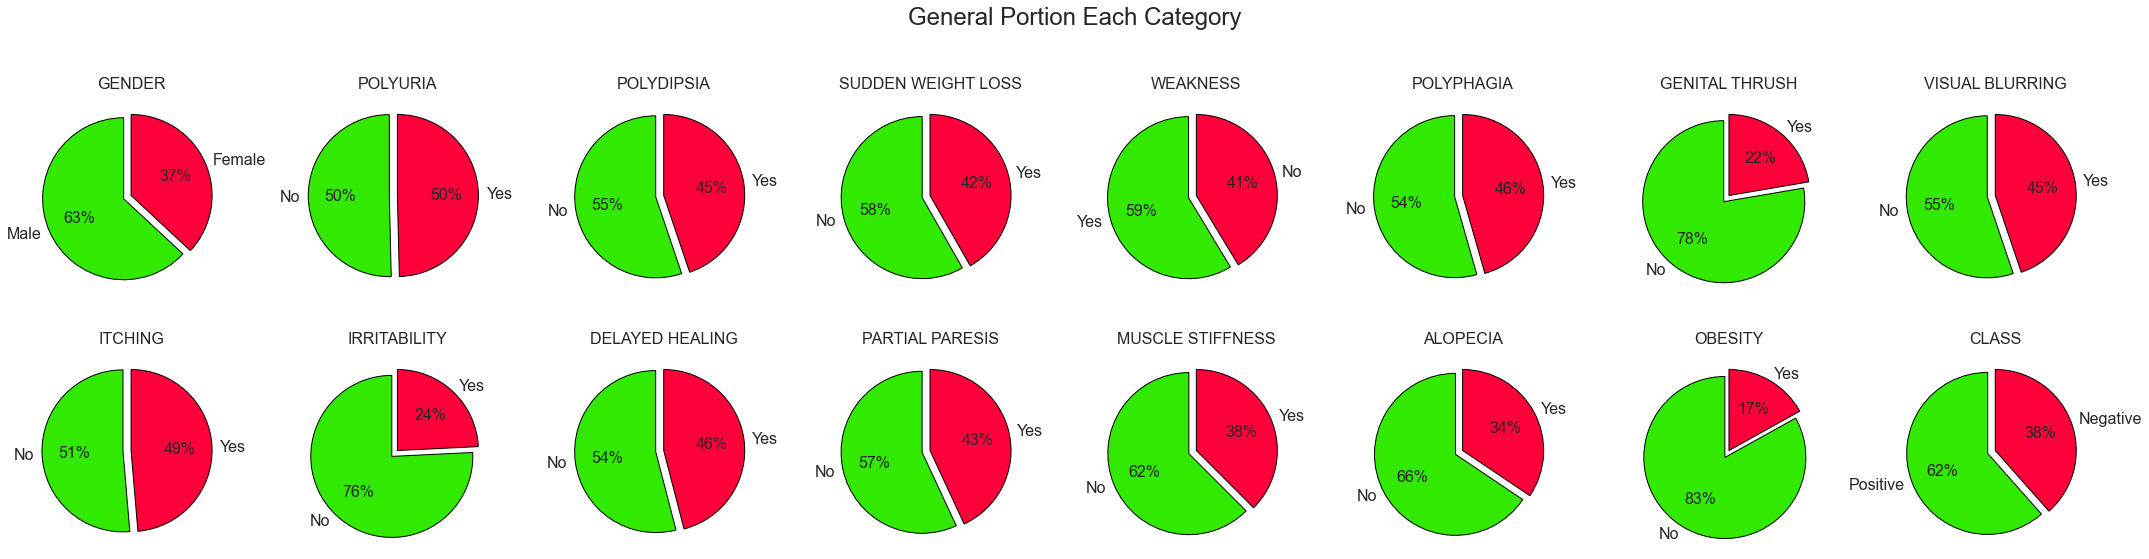

In [14]:
fig, axs = plt.subplots(2, 8, figsize=(30, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.2)
axs = axs.ravel()

for index, col in enumerate(col0):
    df[col].value_counts().plot.pie(autopct = "%1.0f%%",startangle=90, 
                                    explode=[.1,0],shadow = False, ax=axs[index], 
                                    colors = sns.color_palette("prism",2), fontsize=16, 
                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
    axs[index].set_title(col.upper(),fontsize=16)
    axs[index].set_ylabel('')

fig.suptitle('General Portion Each Category',va='bottom', fontsize =24)
fig.tight_layout()

- With all this pie chart, we can get general information about the portion of each category in our data
- From that, we are interested in CLASS figure, 62% Positive and 38% Negative. It means our dataset is not quite balance, we will note this to be a consideration.
- Then, there is a significant "NO" portion (More than 75%) in some categories like Genital Thrush, Obesity, Iritability.
- In this record, the majority  gender is Male with 63%.
- Later we will look deeper in the next analysis focusing on Positive Class.

#### 3.2 Category portion in Class Feature <a id='eda3.2'> </a>

In [15]:
list_color = ['#66ff33', '#3333ff', '#ff0066', '#ffff00']
list_unq_value = ['Male', 'Female', 'Yes', 'No']
dict_color = dict(zip(list_unq_value,list_color))

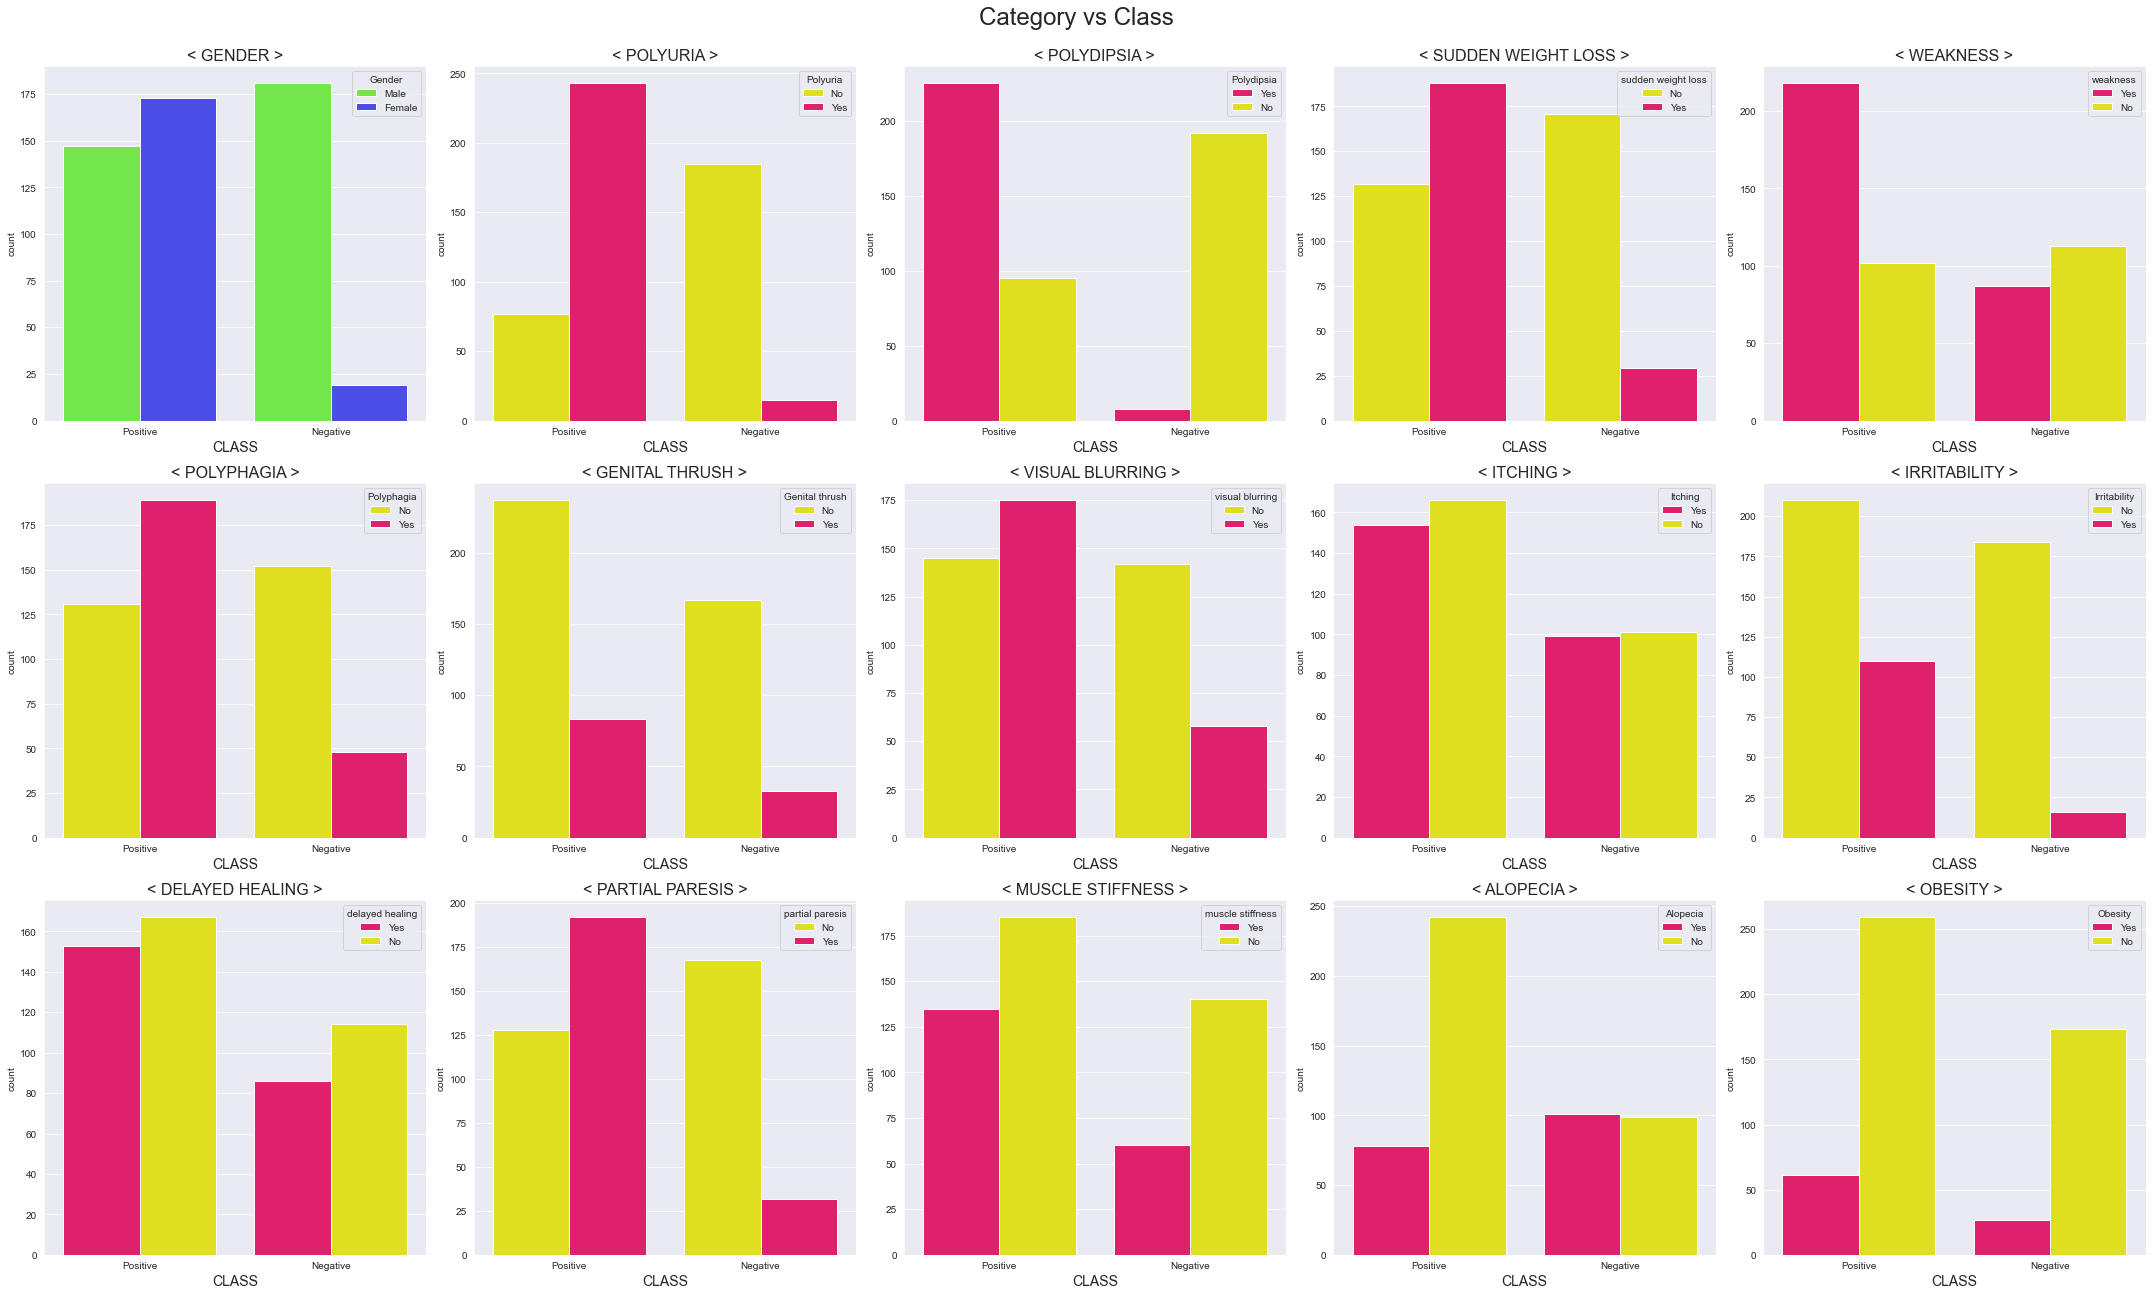

In [16]:
fig, axs = plt.subplots(3, 5, figsize=(30, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()

for index, col in enumerate(col1):
    sns.countplot(x='class', hue=col, data=df, ax=axs[index], palette=dict_color)
    axs[index].set_title(f'< {col.upper()} >',fontsize=16)
    axs[index].set_xlabel('CLASS', fontsize=14)

fig.suptitle('Category vs Class', va='bottom', fontsize =24)
fig.tight_layout()

- From above graph, we can get some informations regarding the portion each Category with respect to Class Feature.
- We can see Female is more than Male in Positive Class. This is quite interesting fact, as we know in our data Male is majority gender, but Female has more portion in Positive class.
- Now we are interested in "Red Bar" (Yes on Symtomp) and also Positive Diabetes, People with Polydipsia, Polyuria, Weakness, Polyphagia, Partial Paresis, Sudden Weight loss have a significant portion in Positive Diabetes. We will see clearly with pareto chart later.
- And for the other Categories, there are no significant in portions.
- Even Alopecia, Obesity, Iritability have significant portion in No-Symtomp, this is quite normal as we know the NO portion is quite significant in if we look back in the graph general portion.

#### 3.3 Categorical vs Possitive Class <a id='eda3.3'> </a>

- Since our target is to know about the person who has Diabetes or not, so we will look more detail into Positive class, and we will analyze which symtomp has the bigger effect.
- We can know that by seeing a pareto chart below.
- Since there is no pareto chart in builtin function, so we make our own pareto chart function.

In [17]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}', clr_dict=None):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
  
    fig, ax1 = plt.subplots(figsize=(13,8))
    barplot = sns.barplot(data= df, x=x, y=y, ax=ax1, palette=clr_dict)
    ax1.set_ylabel('Total Cases')
    ax1.tick_params(labelrotation=90)

    ax2 = ax1.twinx()

    ax2.plot(x, cumsum, '-ro', alpha=0.5)
        
    ax2.set_ylabel('Cumulative Percentage', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = [i/10 for i in range(0, 11)]
    ax2.set_yticks(vals)
    ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]

    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]-0.05), fontweight='heavy' )
        barplot.text(i, y[i], str(round(weights[i]*100,1))+'%', color='black', ha="center", va='bottom')
    
    if title:
        plt.title(title)
    
    plt.show()

In [18]:
df_pareto_yes = pd.DataFrame({'Symtomp':col2})
df_pareto_yes['Yes_case'] = df_pareto_yes.Symtomp.apply(lambda x : df[x][(df['class']=='Positive')&(df[x] == 'Yes')].count())

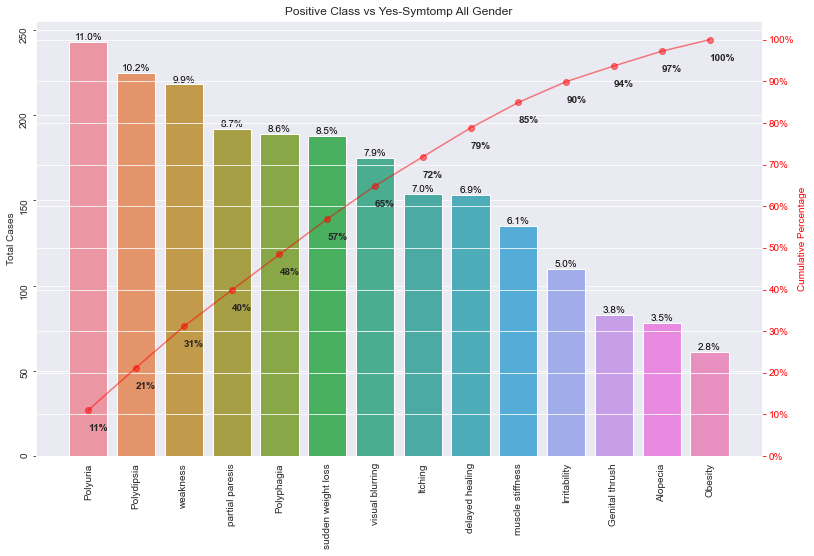

In [19]:
title_yes = 'Positive Class vs Yes-Symtomp All Gender'
pareto_plot(df = df_pareto_yes, x='Symtomp', y='Yes_case', show_pct_y=True, title=title_yes)

- Now we can get clearer information about our Positive Class and Symtomps.
- As we see the portion is quite similar especially our top 6 symtomps.
- The biggest portion is Polyuria, and the smallest is Obesity, it means Obesity has the smallest portion to determine whether the person positive or not.
- We can infer that 85% of Positive Class can be represented with 10 symtomps (Polyuria - Muscle Stiffness).

#### 3.4 Categorical vs Possitive Class grouped by Gender <a id='eda3.4'> </a>

- We already saw about the portion of each symtomp, but until now its mixed all gender. Then we will separate into two group by gender and we will try to see whether interesting fact.

In [20]:
df_pareto_male = pd.DataFrame({'Symtomp':col2})
condition_male = (df['class']=='Positive')&(df.Gender == 'Male')
df_pareto_male['Yes_case'] = df_pareto_male.Symtomp.apply(lambda x : df[x][(df[x] == 'Yes')&condition_male].count())

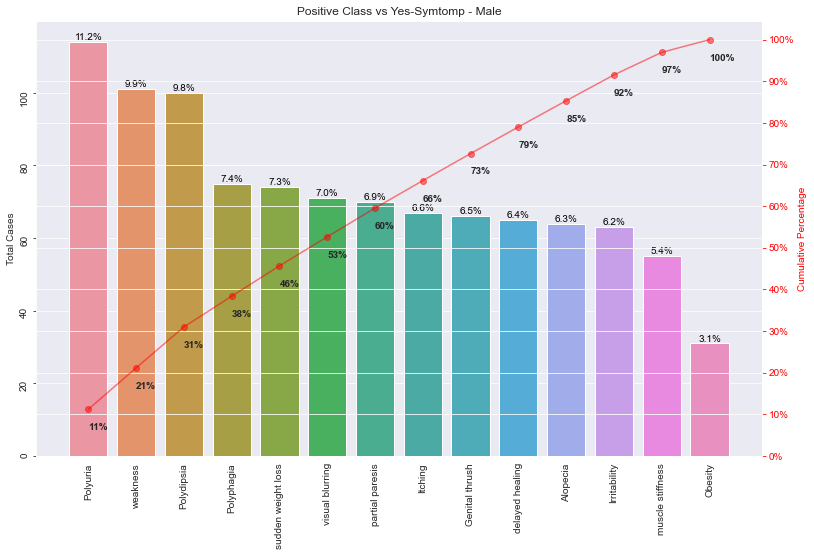

In [21]:
title_male = 'Positive Class vs Yes-Symtomp - Male'
pareto_plot(df = df_pareto_male, x='Symtomp', y='Yes_case', show_pct_y=True, title=title_male)

In [22]:
df_pareto_female = pd.DataFrame({'Symtomp':col2})
condition_female = (df['class']=='Positive')&(df.Gender == 'Female')
df_pareto_female['Yes_case'] = df_pareto_female.Symtomp.apply(lambda x : df[x][(df[x] == 'Yes')&condition_female].count())

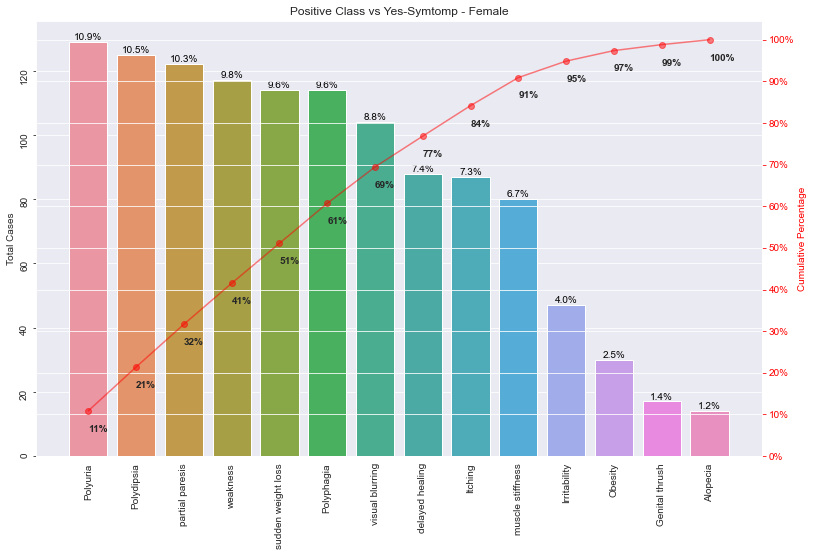

In [23]:
title_female = 'Positive Class vs Yes-Symtomp - Female'
pareto_plot(df = df_pareto_female, x='Symtomp', y='Yes_case', show_pct_y=True, title=title_female)

- From 2 graphs above, Male and Female have different portion of each symtomp. And the order of the portion is different one each other.
- we can see for women the portion is quite similar each top 6 symtomps, otherwise for male the portion is quite different, top 3 symtomps have higher portion than the others.
- Male tends to have more portion of Weakness symtomp than Female. 
- the lowest portion is Alopecia for Female, and Obesity for Male.
- And Partial Paresis is rank 3 with 10.3% portion for Female, otherwise is only 6.9% for Male.

### 4. Relation between Features <a id='eda4'> </a>

- In order to see the relationship between variable, we will try these approaches ;
    - We will plot the association between them.
    - And also we will do statiscal test, Chi-Sq Test, to check with hypotesis testing.
    - For continous variable (age), we will use correlation ratio.

#### 4.1 Relation between Categorical Feature <a id='eda4.1'> </a>

In [24]:
from dython.nominal import cramers_v, correlation_ratio
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

- First we will take out the continous feature in our Data, in this case is AGE.
- Then, we will convert with label encoder to make 0 - 1 value in our Categorical feature.
- Since this is not Continous variable, we will try to find the assosiation with CramerV approach, in my opinion this is a more appropriate way instead of using a Correlation method.
- Association is similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
- You can find out on this good articel as my reference
<a>https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9</a>

In [25]:
df_trans = df[col0].copy()

for feature in df_trans.columns:
    df_trans[feature] = le.fit_transform(df_trans[feature].astype(str))

__4.1 A. Association with CramerV__ <a id='eda4.1a'> </a>

In [26]:
rows = []

for var1 in col0:
    cols = []
    for var2 in col0 :
        cramers = cramers_v(df_trans[var1], df_trans[var2]) # Cramer's V test
        cols.append(round(cramers,3)) # Keeping of the rounded value of the Cramer's V  
    rows.append(cols)

cramers_results = np.array(rows)

In [27]:
cramers_table = pd.DataFrame(cramers_results, columns = df_trans.columns, index =df_trans.columns)

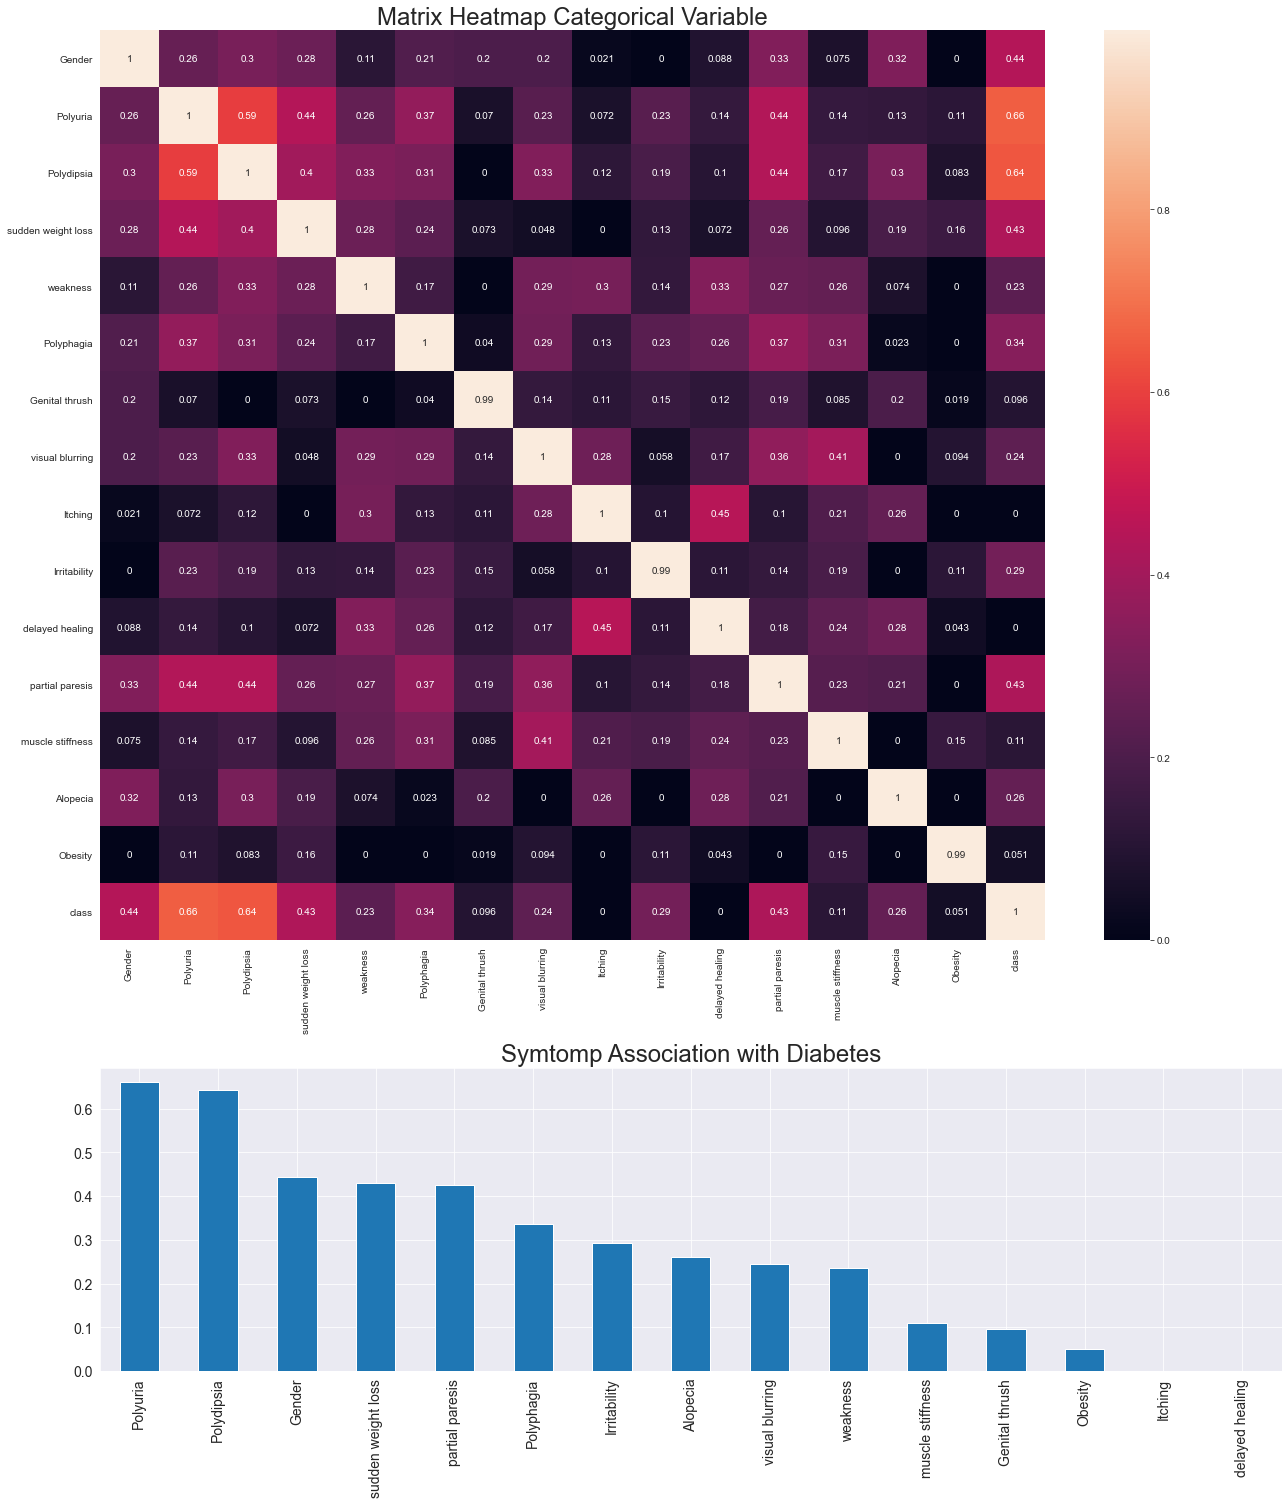

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(18, 21), facecolor='w', edgecolor='k',gridspec_kw={'height_ratios':[3,1]})

sns.heatmap(cramers_table, annot=True, ax =axs[0])
cramers_table['class'].sort_values(ascending=False)[1:].plot.bar(fontsize = 14, rot = 90, grid = True, ax=axs[1])
axs[0].set_title("Matrix Heatmap Categorical Variable", fontsize=24)
axs[1].set_title("Symtomp Association with Diabetes", fontsize=24)

fig.tight_layout()

- In first graph, the Heatmap we can how strong the association between categorical variable, as we mention above this is not correlation, so there is no minus value.
- Then in the second graph we focus on Class Category, we just slice the value from Class then make it in descending order, since we are interested in which Symtomp has strong association with Diabetes. We can see Polyuria and Polydipsia has higher value. And Itching and Delayed Healing tend to not give a association.

__4.1 B. Hypotesis Testing__ <a id='eda4.1b'> </a>

In [29]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency

- First, We start by defining as below;
    - The Null hypothesis (H0) which states that there is no relation between the variables. 
    - An alternate hypothesis (H1) would state that there is a significant relation between the two.
- Then we will check the p_value, we set alpha with 5%. If p_value below our alpha, then we reject the null hypotesis, it means we are accepting the Alternate Hypotesis.
- We will test with Chi-Square Test for Categorical Variable.

In [30]:
alpha = 0.05
chisq_accept = []
chisq_reject = []
for feature in col0:
    if feature != 'class':
        contigency= pd.crosstab(df_trans[feature], df_trans['class']) 
        stat, p, dof, expected = chi2_contingency(contigency)
        if p <= alpha:
            #('There is relation (reject H0)')
            chisq_reject.append(feature)
        else:
            #('There is no relation (fail to reject H0)')
            chisq_accept.append(feature)

In [31]:
print('ChiSq Group Accepting null Hypotesis : ', chisq_accept, sep='\n')
print('-------------------------------------')
print('ChiSq Group Rejecting null Hypotesis : ', chisq_reject, sep='\n')

ChiSq Group Accepting null Hypotesis : 
['Itching', 'delayed healing', 'Obesity']
-------------------------------------
ChiSq Group Rejecting null Hypotesis : 
['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Irritability', 'partial paresis', 'muscle stiffness', 'Alopecia']


- Based on hypotesis testing we can get the information which variable has the significant relation. 
- The result shows us, the first group (Accepting Null Hypotesis) has no significant relation, this statement is supported by Association value in the prev graph. these 3 variables have small values.
- Otherwise, the second group (Accepting Null Hypotesis) have higher value than the first group, by looking in the previous graph. 
- In general we can conclude that our hypotesis testing is supported by our cramerV method.

#### 4.2 Relation between Continues and Categorical <a id='eda4.2'> </a>

- In this section we want to see about correlation between continous variable (Age) and Cateforical variable (Class).
- We will use correlation ratio to see this relatioship.

In [32]:
cor_ratio = correlation_ratio(df['class'], df.Age)

print(f"""After we calculate the correlation ratio, we get {round(cor_ratio,2)}, 
this value is quite small, since correlation has value range [-1, 1], 
we can say that, it has still positive correlation with weak correlation.""")

After we calculate the correlation ratio, we get 0.11, 
this value is quite small, since correlation has value range [-1, 1], 
we can say that, it has still positive correlation with weak correlation.


### << END of EDA Section >>

## < MODEL BUILDING Section > <a id='mb'> </a>

- In this section we will build the model to predict whether the Person has Diabetes or not.
- Since our data is clean and there is no missing value, so we just do scaling in our Age feature. We will use a Standard Scaler because our age's distribution is approximately normally distributed.
- we dont need to do the feature engineering, we already did label encoder in process to find relationship between variable before.

#### 1. Preparing the Data  <a id='mb1'> </a>

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [34]:
X = pd.concat([df.Age, df_trans], axis=1).drop('class', axis =1).copy()
y = df_trans['class'].copy()

- We concat the data between age and the data the we already encoder.
- We split our data into X (Independent Variable) and y (Dependent Variable)

#### 1.1. Spliting Data (Train & Test) <a id='mb1.1'> </a>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 24)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

- We split the Data into 80% training and 20% testing.
- Then, dont forget to stratify the data, to keep our class portion is the same.

In [36]:
print('mean Age in X_train :', X_train.Age.mean(), ', mean Age in total sample :', df.Age.mean())

_,p_v= ttest_1samp(a=X_train.Age, popmean=df.Age.mean())
print('our p_value :', p_v)

if p_v > 0.05:
    print('We accept the null hypotesis, there is no difference in our mean')
else:
    print('We reject the null hypotesis, there is difference in our mean')

mean Age in X_train : 47.89663461538461 , mean Age in total sample : 48.02884615384615
our p_value : 0.8230896733663985
We accept the null hypotesis, there is no difference in our mean


- First we state the hypotesis ;
    - H0 : there is no difference in our mean
    - H1 : there is difference in our mean
- We want that our training data is representing our entire data, so we test the mean of Age with ttest 1 sample.
- As we see the p_value is quite high than 0.05, it means that we accept the null hypotesis. So we 95% sure that our distribution about Age in our training set is same with Entire data.

In [37]:
print('The Portion of Positive and Negative Class in ENTIRE DATA')
print(y.value_counts()/len(y))
print('--------------------')
print('The Portion of Positive and Negative Class in TRAINING DATA')
print(y_train.value_counts()/len(y_train))
print('--------------------')
print('The Portion of Positive and Negative Class in TEST DATA')
print(y_test.value_counts()/len(y_test))

The Portion of Positive and Negative Class in ENTIRE DATA
1    0.615385
0    0.384615
Name: class, dtype: float64
--------------------
The Portion of Positive and Negative Class in TRAINING DATA
1    0.615385
0    0.384615
Name: class, dtype: float64
--------------------
The Portion of Positive and Negative Class in TEST DATA
1    0.615385
0    0.384615
Name: class, dtype: float64


- Since we already split train and test data with stratify mode, but it is for Training and Test Data, for Training and Entire data we have to make sure the portion is equal.
- After we check, the portion is equal between ENTIRE data and TRAINING data as above.

#### 1.2 Scaling Age Feature <a id='mb1.2'> </a>

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

In [40]:
scaler = StandardScaler()
X_train.loc[:,'Age'] = scaler.fit_transform(X_train[['Age']]).reshape(-1).tolist()
X_test.loc[:,'Age'] = scaler.transform(X_test[['Age']]).reshape(-1).tolist()

- we fit our data only in X_train, because we dont want any data leakege.
- Then we apply the scaler into test data, in order transforming Age in the test data.

#### 2. Building Model for Training - Testing <a id='mb2'> </a>

- We will try 4 Models to see which one does it better in seperating Positive and Negative Class ;
    - Logistic Regression from Linear model
    - Ensemble Model, we try model Random Forest
    - Neighbors Model, we try KNN Classifier
    - And lastly, we are also interested in Support Vector Machine

In [41]:
from sklearn.metrics import  accuracy_score, roc_curve, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def evaluate_matrix(ytrue, ypred, name):
    matrix_name = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC']
    acc = accuracy_score(ytrue, ypred)
    roc = roc_auc_score(ytrue, ypred)
    prec = precision_score(ytrue, ypred)
    rec = recall_score(ytrue, ypred)
    f1 = f1_score(ytrue, ypred)
    
    matrix_dict = dict(zip(matrix_name, [name, acc, prec, rec, f1, roc]))
    
    return matrix_dict

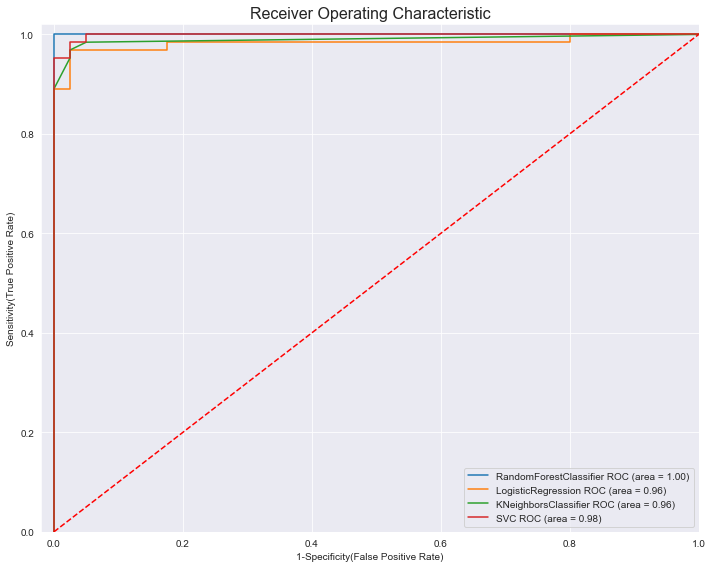

,Model,Accuracy,Precision,Recall,F1_Score,ROC,Mean_cross_val
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.971142
1,LogisticRegression,0.961538,0.983871,0.953125,0.968254,0.964063,0.911159
2,KNeighborsClassifier,0.961538,0.983871,0.953125,0.968254,0.964063,0.911015
3,SVC,0.980769,0.984375,0.984375,0.984375,0.979688,0.961618


In [43]:
# Logistic Regression
lr_model = LogisticRegression()

# Random Forest
rf_model = RandomForestClassifier()

# SVC
svc_model = SVC(probability=True)

# KNeighbors
knn_model = KNeighborsClassifier()

all_model = [rf_model, lr_model, knn_model, svc_model]

matrix = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC']
model_results = pd.DataFrame(columns= matrix)

kfold = KFold(n_splits=5)
scoring = 'accuracy'

list_roc = []
plt.figure(figsize=(10,8))

for model in all_model:
    name = model.__class__.__name__
    model.fit(X_train, y_train)
    cv_acc = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold, scoring=scoring)
    y_predict = model.predict(X_test)
    
    matrix_dict = evaluate_matrix(y_test, y_predict, name)
    matrix_dict['Mean_cross_val'] = cv_acc.mean()
    model_results = model_results.append(matrix_dict, ignore_index=True)
    
    # Plot TRUE POSITIVE RATE AND FALSE POSITIVE RATE
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_figure = plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, matrix_dict['ROC']))
    
    dict_roc = {'model': name, 'fpr' :fpr, 'tpr': tpr}
    list_roc.append(dict_roc)
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic', fontsize= 16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

display(model_results)

- From table above we can see clearly, Random Forest model stands out from the others.
- As we know our Class is not quite balance, so we are interested to look in the F1 Score, yes still Random Forest has the highest Score.
- And also in ROC Curve we can see, Random Forest position is on the most top left (blue line).
- Since the Random Forest give us perfect score in predicting Test Data, we dont need to tune up the hyperparameter. We dont need to do GridsearchCV for that.
- Conclusion is we choose Random Forest Model to be predicting our Data.

In [44]:
# model_results.to_csv('model_perf.csv', index=False)

In [45]:
dfxxx = pd.DataFrame(columns=['model', 'fpr', 'tpr'])

for index in range(len(list_roc)):
    dfxxx = dfxxx.append(pd.DataFrame(list_roc[index]), ignore_index=True)

In [46]:
# dfxxx.to_csv('df_roc.csv', index = False)

#### 3. Building Final Model <a id='mb3'> </a>

- In this section we will build complete pipeline Model.
- And also we will use the Entire Data as the training, because we want to feed our machine learning model with all the informartion, and then we can use this model for predicting in the future data. 
- And we try to predict with Raw Data.

In [47]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


#### 3.1 Building the Model Pipeline <a id='mb3.1'> </a>

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
categorical_column = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_column.remove('class')
continous_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [57]:
df.shape

(520, 17)

In [56]:
len(categorical_column)

15

In [50]:
X_raw = df.drop('class', axis =1).copy()

In [51]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [52]:
preprocessor = ColumnTransformer(transformers=[
                 ('num', numeric_transformer, continous_column),
                 ('cat', categorical_transformer, categorical_column)])

In [53]:
final_model = Pipeline(steps=[
                      ('Preprocessor', preprocessor),
                      ('RF_classifier', RandomForestClassifier())])

#### 3.2 Training Model Pipeline and Check Score with Cross Validation, predict Raw Data <a id='mb3.2'> </a>

In [54]:
final_model.fit(X_raw, y)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                        

In [55]:
cv_acc_final = cross_val_score(estimator = final_model, X = X_raw, y = y, cv = 7, scoring='accuracy')

print(f'Mean Cross Validation Score with Random Forest : {round(cv_acc_final.mean(),2)*100}%')
y_pred_all = final_model.predict(X_raw)
final_eva = evaluate_matrix(y, y_pred_all, 'RandomForest')
print(final_eva)

Mean Cross Validation Score with Random Forest : 98.0%
{'Model': 'RandomForest', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1_Score': 1.0, 'ROC': 1.0}


- After fitting all data, we want to see the score using cross validation, we get 98% accuracy score. we still get a good score after training all data with random forest classifier.
- We also want to see the perfomance using evaluate matrix function, we can see, f1_score is 100% is a high score. and since our focus on "all the people who are diabetes, how many of those we correctly predict", we will focus on  RECALL score, and also we get 100%.

### << END of MODEL BUILDING Section >>

In [58]:
import pickle

pickle.dump(final_model, open("randomforest_final", 'wb'))

## SUMMARY  <a id='sum'> </a>

- Our Dataset contains 62% Positive Diabetes and 38% Negative.
- Symtomps 'Polyuria' and 'Polydipsia' highly associate with Diabetes People.
- Otherwise 'Itching' and 'delayed healing' tend to not give high association.
- And also Age doesnt give a high correlation to the Diabetes effect.
- For the other symtomps have moderate association with Diabetes.
- Male is the dominant gender in this data, but Female is more likely having Diabetes.
- We succeed in building a Classifier with Random Forest algorythm.
- This Classifier gives us a good score both in Training and Test Data with more than 97% accuracy.
- It shows us that this model is applicable for Client to use on predicting future data.

#### In addition :
- As consultant in Data Science field, you can help the Client by using Data thats crawled from internet in certains field, to support their existing data.
- And also you can provide some dashboards using built in library in python, such as Plotly, Bokeh etc., so you dont need to buy some paid tools to do that.
- Try to help them in case of their data collection management is not quite good.